# Advanced Statistics For Physics - Seventh assignment

* **Student:** Faorlin Tommaso
* **ID:** 2021857
* **Course:** Physics of Data

In [1]:
options(tidyverse.quiet = TRUE)
library(gridExtra)
library(tidyverse)

# Exercise 1


### A

The probability distribution for $y$ is a binomial

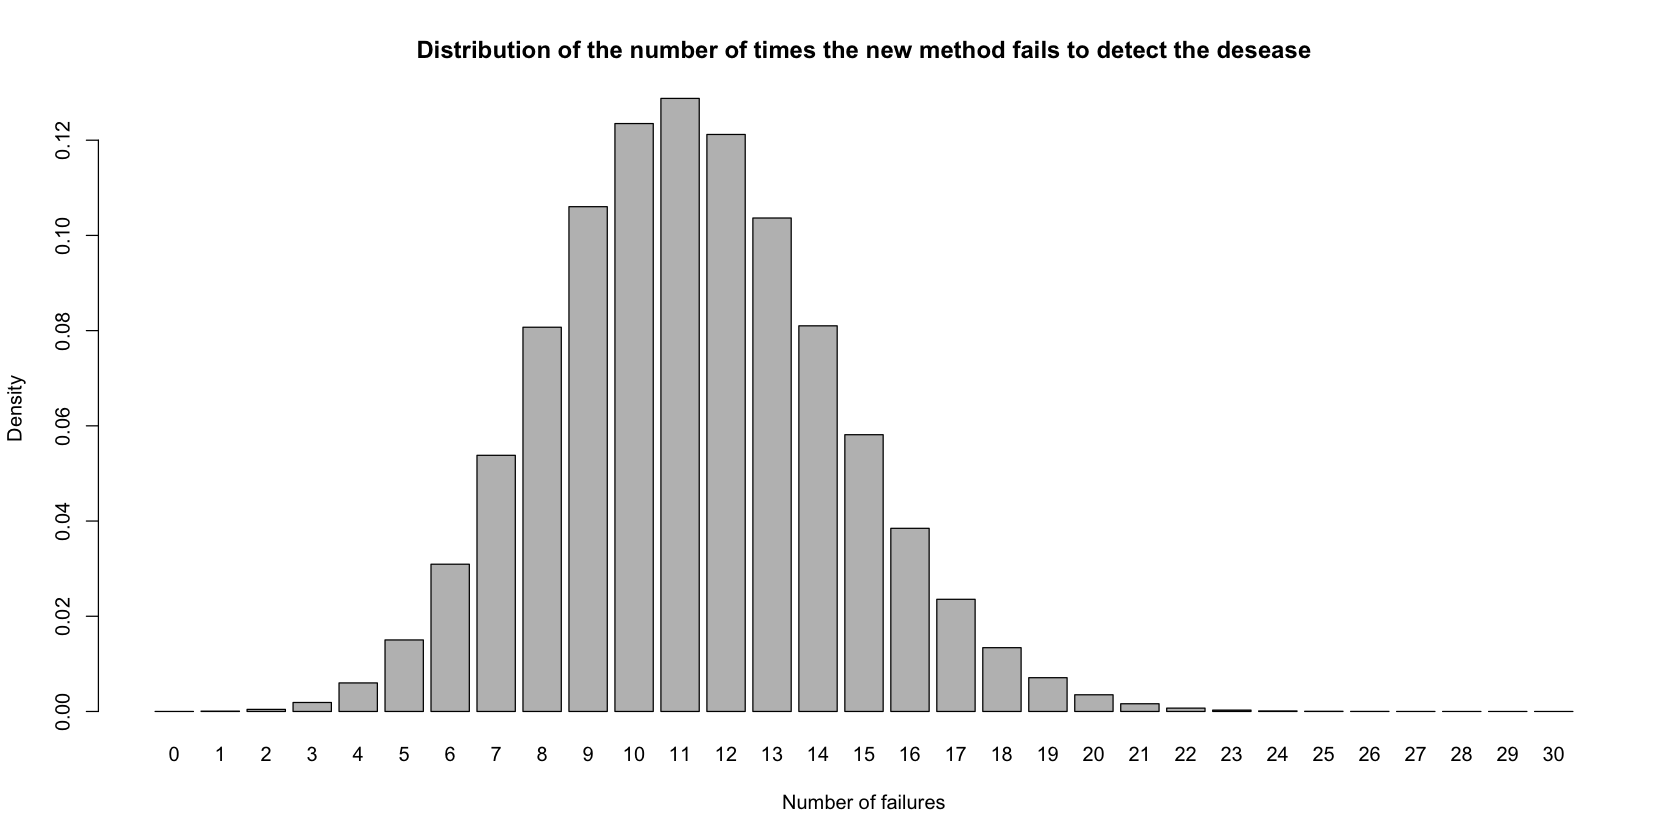

In [2]:
p.fail=0.15
n=75
x <- seq(0,30)
options(repr.plot.width=14, repr.plot.height=7)
barplot(dbinom(x, 75, 0.15),
        names.arg=x,
        xlab='Number of failures',
        ylab='Density',
        main='Distribution of the number of times the new method fails to detect the desease')

### B

An unbiased, frequentist estimator for the Binomial distribution is:
$$\hat{p}_F=\frac{y}{n}=\frac{6}{75}=0.08$$

### C

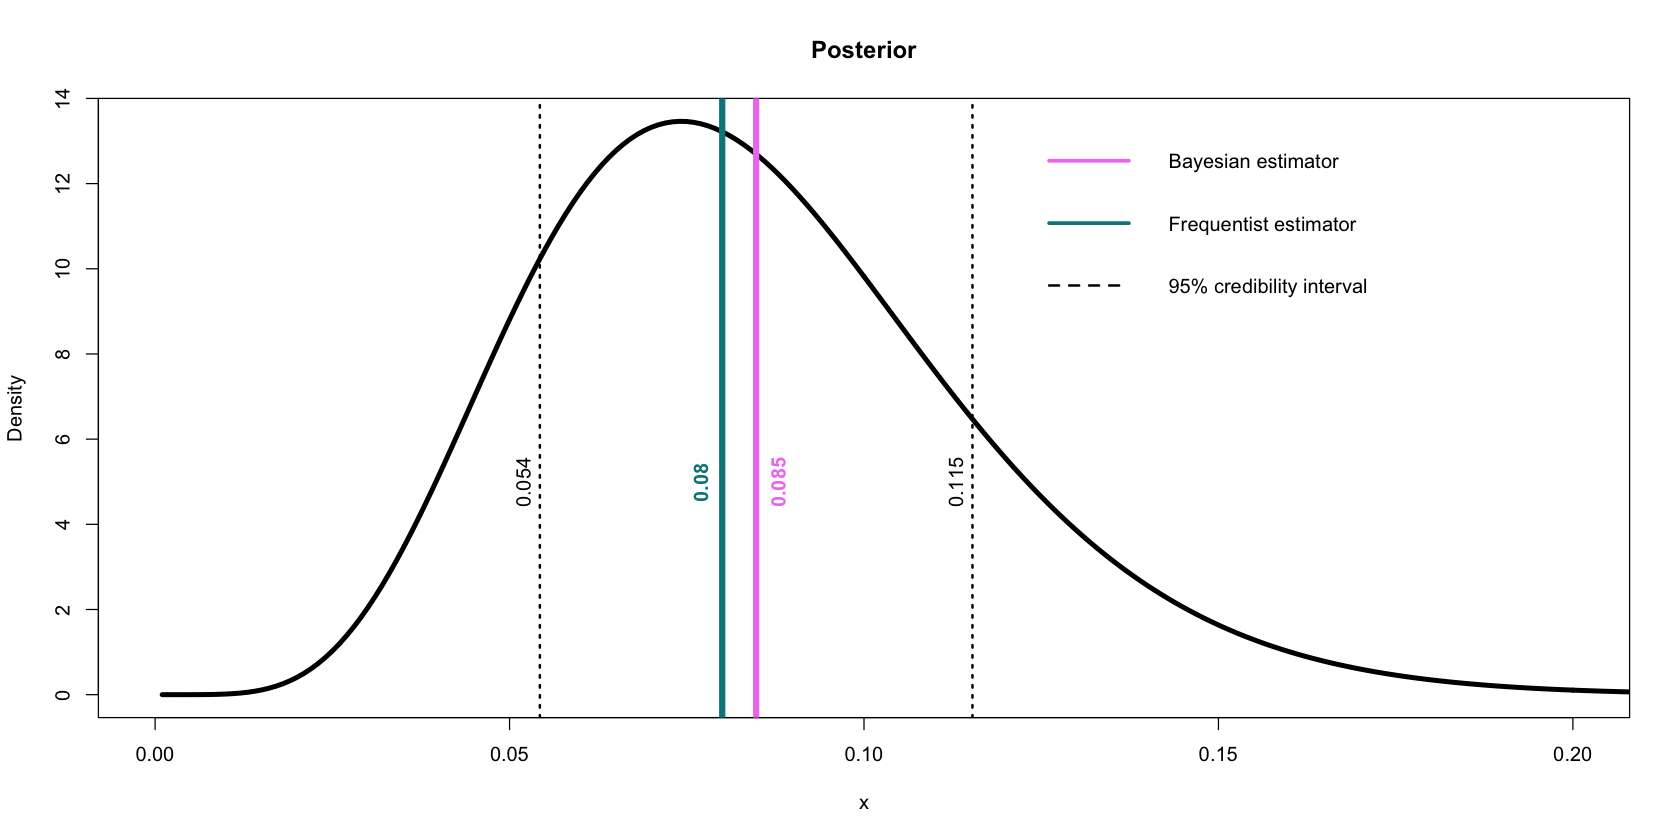

In [3]:
mu=0.15
var=0.14^2
alpha <- ((1-mu)/var-1/mu)*mu^2
beta <- alpha*(1/mu-1)

x <- seq(0,1,0.001)

y<-6
n<-75

post <- function(x){
    return(dbinom(y, n, x)*dbeta(x, alpha, beta))
}

post.norm <- function(x){
    return(post(x)/integrate(post,0,1)$valu)
}

#update the posterior parameters and calculate mean and variance
alpha.p <- alpha+y
beta.p <- beta+n-y

mean<-(alpha.p)/(alpha.p+beta.p)
var<-(1/(n+2))^2*n*(y/n)*(1-(y/n))
std<-sqrt(var)

options(repr.plot.width=14, repr.plot.height=7)

plot(x,
     post(x)/integrate(post,0,1)$value,
     type='l',
     xlim=c(0,0.2),
     xlab='x',
     ylab='Density',
     main='Posterior',
     col='black',
     lwd=4)

abline(v=mean,     lwd=5, col='violet')
abline(v=mean-std, lwd=2, lty='dotted')
abline(v=mean+std, lwd=2, lty='dotted')
abline(v=6/75,lwd=5, col='turquoise4')
legend('topright',
           legend=c("\nBayesian estimator\n", "\nFrequentist estimator\n", "95% credibility interval"),
           col=c("violet","turquoise4","black"),
           lty=c(1,1,2),
           lwd=c(3,3,2),
           bty = "n",
          )

text(x=round(mean-std,3)-0.002,y=5,round(mean-std,3),srt=90)
text(x=round(6/75,3)-0.003,y=5,round(6/75,3),srt=90, col ='turquoise4', font=2)
text(x=round(mean,3)+0.003,y=5,round(mean,3),srt=90, col ='violet', font=2)
text(x=round(mean+std,3)-0.002,y=5,round(mean+std,3),srt=90)

Obviously, since the distribution is slightly skewed (asymmetric), the mean of the posterior (that is our Bayesian estimator for $p$) does not correspond with the peak of the distribution.

### D

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in $15\%$ of the patients ($p_0=0.15$) that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method. On this sample, the new method fails to detect the disease in y = 6 cases ($p=?$). Are we allowed to say, with this knowledge, that $p<p_0$ at a $5\%$ level of significance?

Our null hypothesis is that $p\geq p_0$ (that the new method is worse than the old one, i.e. the proability of failing to detect a disease is higher), our alternative hypothesis is $p<p_0$, and we will bring the former to 'trial'. 


Bayesian inference gives us a probability distribution for the failure probability $p$. Given that, we can integrate out the area under the curve up to $0.15$, namely the p-value, and see if it is evaluates to less than the significance level of $5\%$.

In [4]:
print(paste('The result is:',round((1-integrate(post.norm, 0, 0.15)$value)*100,2),'%'))

[1] "The result is: 3.13 %"


The result is lower than the significance level of $5\%$, meaning that we **can reject** the null hypothesis at the $5\%$ level of significance (the test has produced a significant result). In other words, in less than the $5\%$ of the cases I will reject the null hypothesis $p\geq p_0$ given that it was true.

### E

In the frequentist approach I will need instead to define the NULL distribution of the test statistic, that in this case will be the following Binomial: $$Bin(x|n=75,p=0.15)$$
Also here I choose the same level of significance $\alpha=5\%$ and I see wether $y=6$ lies in the rejection or acceptance region for the null hypothesis.

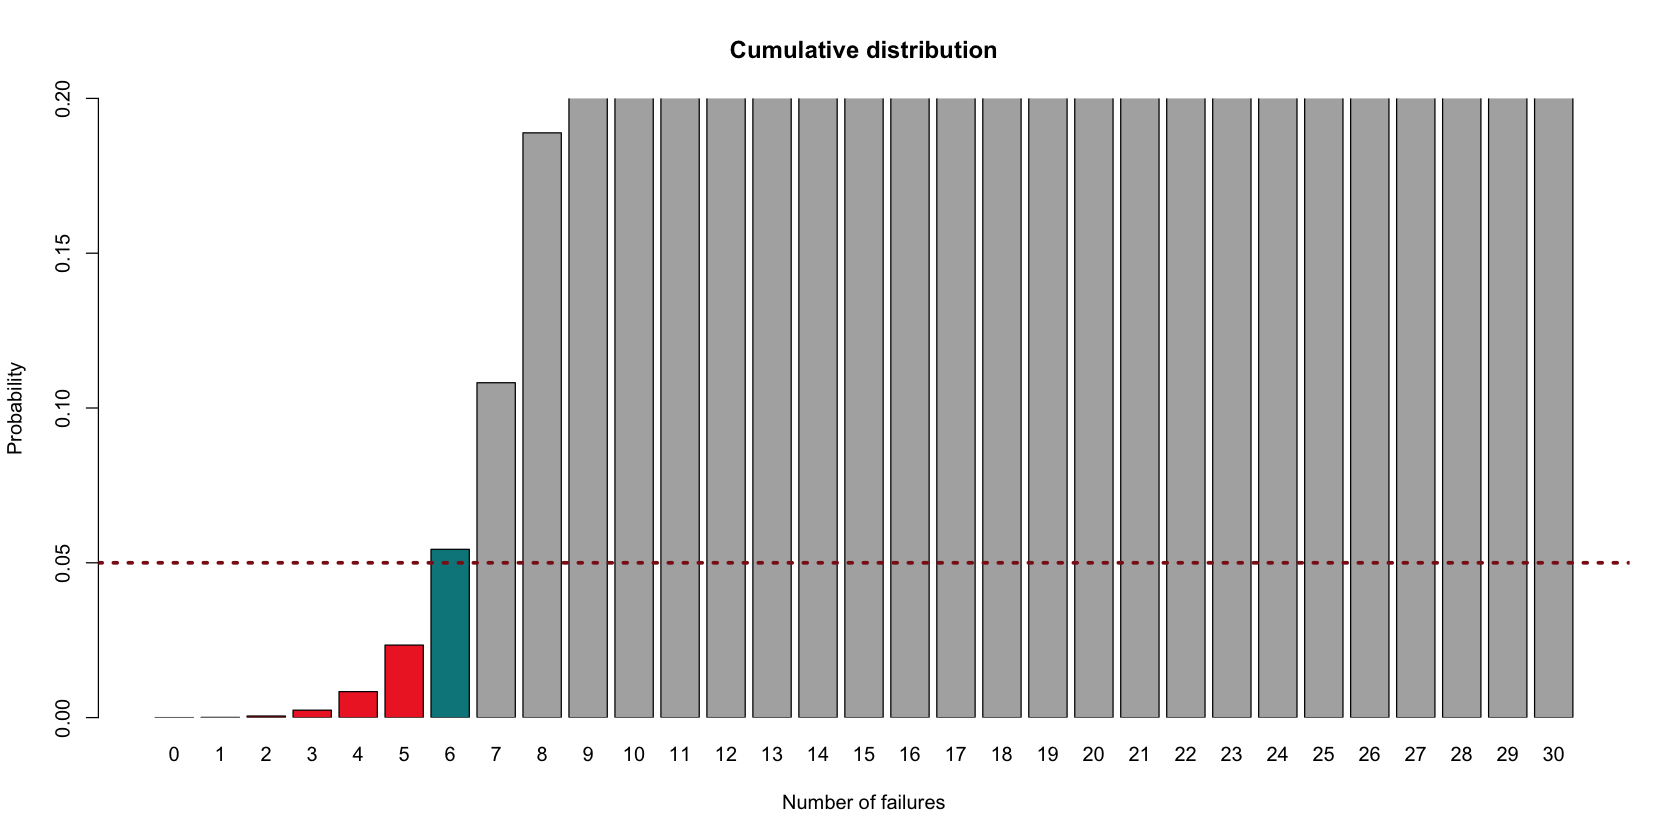

In [5]:
r.lo<-qbinom(0.05,75,0.15)
x <- seq(0,30)
bins <-  pbinom(x, 75, 0.15)
cols <- rep('gray69', 31)
cols <- replace(cols, seq(1,r.lo+1), 'firebrick2')
cols <- replace(cols, 7, 'turquoise4')
barplot(bins, names.arg=x, col=cols, ylim=c(0,0.2),xlab='Number of failures',ylab='Probability', main='Cumulative distribution', xpd = FALSE)
abline(h=0.05, col ='firebrick4', lty='dotted', lwd=3)

The area below the dotted line is the null-hypothesis rejection region. Our measure belongs to a bin in the acceptance region, so I will accept the null hypothesis. Let's calculate the p-value of our measure:

In [6]:
print(paste('The p-value is:',round(pbinom(6, 75, 0.15)*100,3),'%'))

[1] "The p-value is: 5.435 %"


The p-value is the evidence against a null hypothesis. The smaller the p-value, the stronger to reject the null hypothesis. The p-value is higher than the significance level of $5\%$, meaning that we **cannot reject** the null hypothesis at the $5\%$ level of significance (the test has not produced a significant result). Accepting the null hypothesis, we say that $p<p_0$ at a significance level of $5\%$, in other words, chance alone remains a reasonable explanation for the observed discrepancy.

In [7]:
binom.test(6,75,0.15,'less')


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


Carrying on also the statistical test provided by R on the binomial (paying attention in the 'less' option for the 1-sided test) we obtain the same result we did by hand one cell above.

# Exercise 2

### A,B

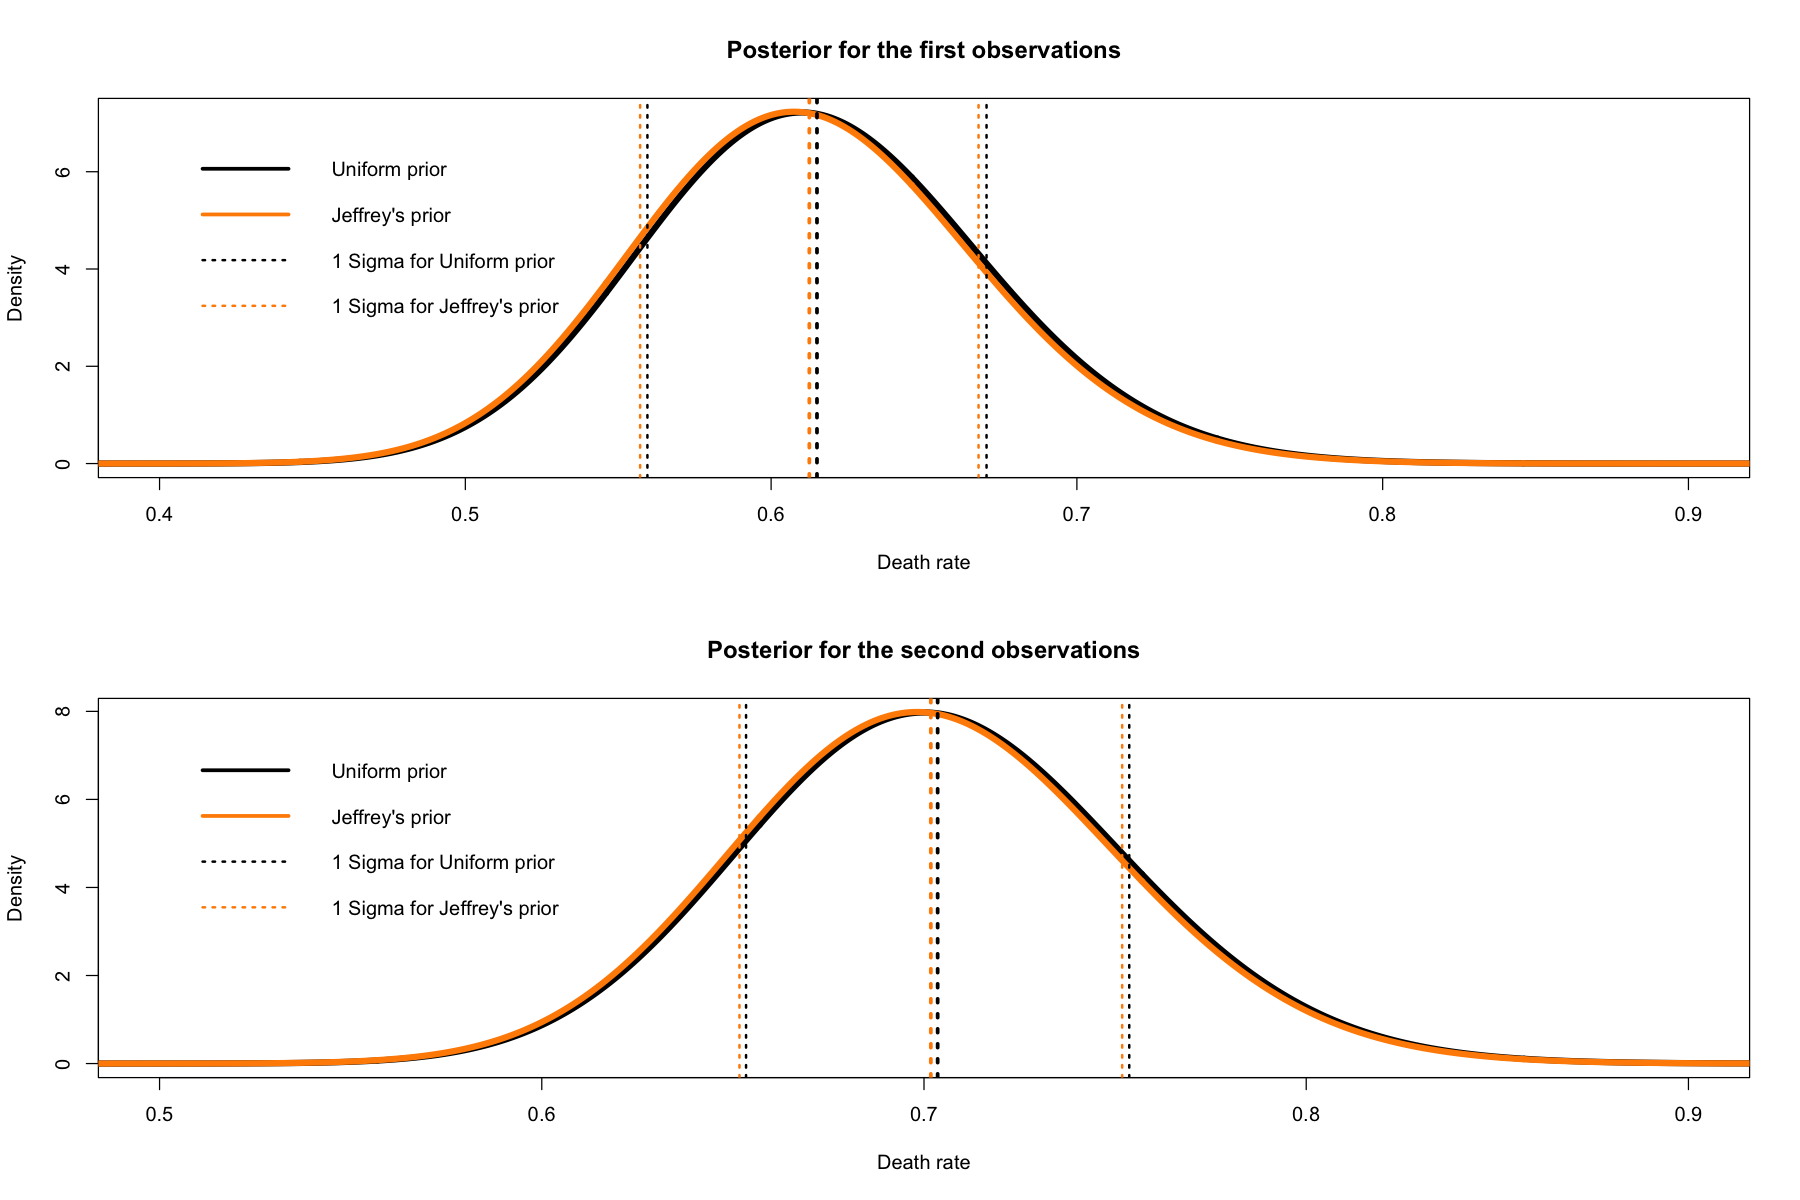

In [8]:
options(repr.plot.width=14, repr.plot.height=7)

n1 <- c(109, 65 , 22, 3, 1)
n2 <- c(144, 91 , 32,11, 2)
val <- c(0,1,2,3,4)
means<-seq(0,1,0.001)

results <- data.frame(x=means,
                      uni.n1 = dgamma(means, sum(n1*val)+1, sum(n1)),
                      uni.n2 = dgamma(means, sum(n2*val)+1, sum(n2)),
                      jef.n1 = dgamma(means, sum(n1*val)+0.5,sum(n1)),
                      jef.n2 = dgamma(means, sum(n2*val)+0.5,sum(n2))
                      )

credibility.95 <- function(cumulative.area, cl=0.95){
    a = 1-cl
    for (i in 1:length(cumulative.area-1)){
        prob <- seq(from=0, by=1/1000, length.out=1000)
        #looking for the point at which we overcome the first two quantiles
        if (cumulative.area[i+1]>=a/2&cumulative.area[i]<=a/2){
            x1 <- round((prob[i+1]+prob[i])/2,4)
            }
        if (cumulative.area[i+1]>=(cl+a/2)&cumulative.area[i]<=(cl+a/2)){
            x2 <- round((prob[i+1]+prob[i])/2,4)
        }
    }
    return(c(x1,x2))
}

mean.uni.n1<-(sum(n1*val)+1)/sum(n1)
mean.uni.n2<-(sum(n2*val)+1)/sum(n2)
var.uni.n1<-(sum(n1*val)+1)/(sum(n1)*sum(n1))
var.uni.n2<-(sum(n2*val)+1)/(sum(n2)*sum(n2))
std.uni.n1<-sqrt(var.uni.n1)
std.uni.n2<-sqrt(var.uni.n2)

mean.jef.n1<-(sum(n1*val)+0.5)/sum(n1)
mean.jef.n2<-(sum(n2*val)+0.5)/sum(n2)
var.jef.n1<-(sum(n1*val)+0.5)/(sum(n1)*sum(n1))
var.jef.n2<-(sum(n2*val)+0.5)/(sum(n2)*sum(n2))
std.jef.n1<-sqrt(var.jef.n1)
std.jef.n2<-sqrt(var.jef.n2)

#numerical medians in the case of a uniform prior
#median.uni.n1 <- qgamma(0.5, sum(n1)+1,length(n1))
median.uni.n1 <- qgamma(0.5, sum(n1*val)+1,sum(n1))
median.uni.n2 <- qgamma(0.5, sum(n2*val)+1,sum(n2))
#numerical medians in the case of a Jeffrey's prior
median.jef.n1 <- qgamma(0.5, sum(n1*val)+0.5,sum(n1))
median.jef.n2 <- qgamma(0.5, sum(n2*val)+0.5,sum(n2))

#credibility interval in the case of a uniform prior
uni.n1.area  <- (1/length(results$uni.n1 ))*cumsum(results$uni.n1)
uni.n2.area <- (1/length(results$uni.n2))*cumsum(results$uni.n2)

#credibility interval in the case of a  Jeffrey's prior
jef.n1.area  <- (1/length(results$jef.n1 ))*cumsum(results$jef.n1)
jef.n2.area <- (1/length(results$jef.n2))*cumsum(results$jef.n2)

par(mfrow = c(2, 1))
options(repr.plot.width=15, repr.plot.height=10)
plot(results$x, results$uni.n1, type='l', xlim=c(0.4,0.9), lwd=5, xlab='Death rate',ylab='Density', main='Posterior for the first observations')
legend(0.4,7,
        legend=c("Uniform prior", "Jeffrey's prior", "1 Sigma for Uniform prior", "1 Sigma for Jeffrey's prior"),
           col=c("black","darkorange","black", "darkorange"),
           lty=c(1,1,3,3),
           lwd=c(3,3,2,2),
           bty = "n",
          )
lines(results$x, results$jef.n1, type='l', xlim=c(0.4,0.9), lwd=5,col='darkorange')
abline(v=mean.uni.n1, lwd=3, lty='dotted')
abline(v=mean.jef.n1,col='darkorange', lwd=3, lty='dotted')
abline(v=mean.uni.n1-std.uni.n1, lwd=2, lty='dotted')
abline(v=mean.uni.n1+std.uni.n1, lwd=2, lty='dotted')
abline(v=mean.jef.n1-std.jef.n1, lwd=2,col='darkorange', lty='dotted')
abline(v=mean.jef.n1+std.jef.n1, lwd=2,col='darkorange', lty='dotted')

plot(results$x, results$uni.n2, type='l', xlim=c(0.5,0.9), lwd=5, xlab='Death rate',ylab='Density', main='Posterior for the second observations')
legend(0.5,7.7,
        legend=c("Uniform prior", "Jeffrey's prior", "1 Sigma for Uniform prior", "1 Sigma for Jeffrey's prior"),
           col=c("black","darkorange","black", "darkorange"),
           lty=c(1,1,3,3),
           lwd=c(3,3,2,2),
           bty = "n",
          )
lines(results$x, results$jef.n2, type='l', xlim=c(0.5,0.9), lwd=5, col='darkorange')
abline(v=mean.uni.n2-std.uni.n2, lwd=2, lty='dotted')
abline(v=mean.uni.n2+std.uni.n2, lwd=2, lty='dotted')
abline(v=mean.uni.n2, lwd=3, lty='dotted')
abline(v=mean.jef.n2,col='darkorange', lwd=3, lty='dotted')
abline(v=mean.jef.n2-std.jef.n2, lwd=2,col='darkorange', lty='dotted')
abline(v=mean.jef.n2+std.jef.n2, lwd=2,col='darkorange', lty='dotted')

In [9]:
print(paste('The posterior mean for a uniform prior and the observation 1 is:', round(mean.uni.n1,2)))
print(paste('The posterior mean for a uniform prior and the observation 2 is:', round(mean.uni.n2,2)))
print(paste('The posterior mean for a Jeffrey\'s prior and the observation 1 is:', round(mean.jef.n1,2)))
print(paste('The posterior mean for a Jeffrey\'s prior and the observation 2 is:', round(mean.jef.n2,2)))
print('====================================================================================')
print(paste('The posterior median for a uniform prior and the observation 1 is:', round(median.uni.n1,3)))
print(paste('The posterior median for a uniform prior and the observation 2 is:', round(median.uni.n2,3)))
print(paste('The posterior median for a Jeffrey\'s prior and the observation 1 is:', round(median.jef.n1,3)))
print(paste('The posterior median for a   Jeffrey\'s prior and the observation 2 is:', round(median.jef.n2,3)))
print('====================================================================================')
print(paste('The posterior variance for a uniform prior and the observation 1 is:', round(var.uni.n1,4)))
print(paste('The posterior variance for a uniform prior and the observation 2 is:', round(var.uni.n2,4)))
print(paste('The posterior variance for a Jeffrey\'s prior and the observation 1 is:', round(var.jef.n1,4)))
print(paste('The posterior variance for a Jeffrey\'s prior and the observation 2 is:', round(var.jef.n2,4)))
print('====================================================================================')
print(paste('The 95% credibility interval for a uniform prior and the observation 1 is:',paste0('[',credibility.95(uni.n1.area)[1],',',credibility.95(uni.n1.area)[2],']')))
print(paste('The 95% credibility interval for a uniform prior and the observation 2 is:',paste0('[',credibility.95(uni.n2.area)[1],',',credibility.95(uni.n2.area)[2],']')))
print(paste('The 95% credibility interval for a Jeffrey\'s prior and the observation 1 is:',paste0('[',credibility.95(jef.n1.area)[1],',',credibility.95(jef.n1.area)[2],']')))
print(paste('The 95% credibility interval for a Jeffrey\'s prior and the observation 2 is:',paste0('[',credibility.95(jef.n2.area)[1],',',credibility.95(jef.n2.area)[2],']')))

[1] "The posterior mean for a uniform prior and the observation 1 is: 0.62"
[1] "The posterior mean for a uniform prior and the observation 2 is: 0.7"
[1] "The posterior mean for a Jeffrey's prior and the observation 1 is: 0.61"
[1] "The posterior mean for a Jeffrey's prior and the observation 2 is: 0.7"
[1] "===================================================================================="
[1] "The posterior median for a uniform prior and the observation 1 is: 0.613"
[1] "The posterior median for a uniform prior and the observation 2 is: 0.702"
[1] "The posterior median for a Jeffrey's prior and the observation 1 is: 0.611"
[1] "The posterior median for a   Jeffrey's prior and the observation 2 is: 0.701"
[1] "===================================================================================="
[1] "The posterior variance for a uniform prior and the observation 1 is: 0.0031"
[1] "The posterior variance for a uniform prior and the observation 2 is: 0.0025"
[1] "The posterior varianc

# Exercise 3

### A
We are dealing with a Bernoulli process. When we study a sample from a stream of water, this can either contain a high level of bacters with probability $p$, or not, with probability $1-p$. We have sample set of 116 specimens, 11 of those are considered hazardous.
The frequentist estimator for $p$, in the light of these data, is $$p=\frac{y}{n}=\frac{11}{116}=0.095$$

### B
Bayesian inference can help us defining a probability density function for the parameter $p$. We need to specify a prior knowledge, by encoding it into a $\beta(1,10)$. The posterior probability distribution, since the Beta prior is a conjugate prior of the Binomial distribution, will be just an 'update in the statistical manifold of the Beta priors' (consideration from the course of Information Theory held by Jeff Byers). 

In [10]:
#experimental data
n<-116
y<-11

x<-seq(0,1,by=0.001)

#parameter update in the statistical manifold
alpha.p<-1+y
beta.p<-10+n-y

#posterior pdf
post <- function(x){
    dbeta(x,alpha.p,beta.p)
}

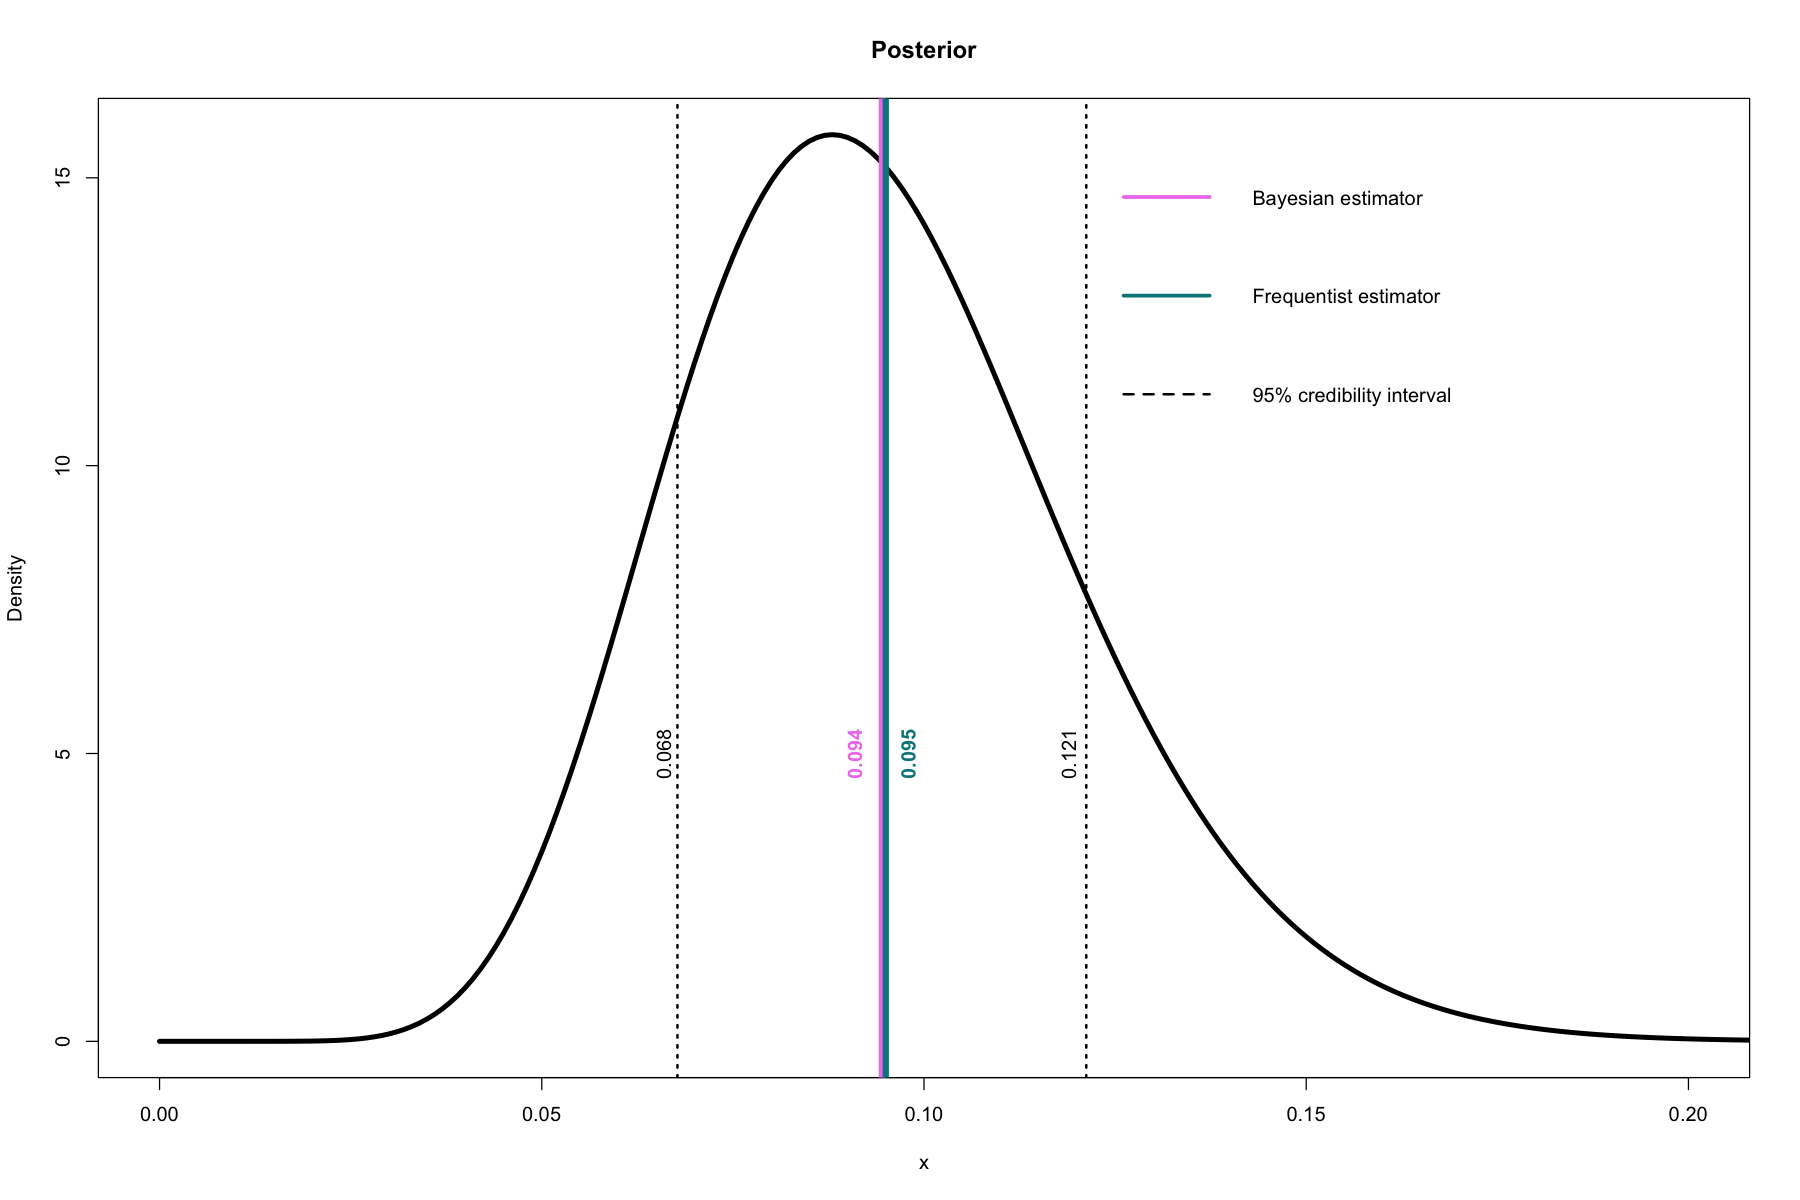

In [11]:
mean<-(alpha.p)/(alpha.p+beta.p)
var<-(1/(n+2))^2*n*(y/n)*(1-(y/n))
std<-sqrt(var)

plot(x,
     post(x)/integrate(post,0,1)$value,
     type='l',
     xlim=c(0,0.2),
     xlab='x',
     ylab='Density',
     main='Posterior',
     col='black',
     lwd=4)

abline(v=mean,     lwd=5, col='violet')
abline(v=mean-std, lwd=2, lty='dotted')
abline(v=mean+std, lwd=2, lty='dotted')
abline(v=round(y/n,3),lwd=5, col='turquoise4')
    legend('topright',
           legend=c("\nBayesian estimator\n", "\nFrequentist estimator\n", "95% credibility interval"),
           col=c("violet","turquoise4","black"),
           lty=c(1,1,2),
           lwd=c(3,3,2),
           bty = "n",
          )

text(x=round(mean-std,3)-0.002,y=5,round(mean-std,3),srt=90)
text(x=round(y/n,3)+0.003,y=5,round(y/n,3),srt=90, col ='turquoise4', font=2)
text(x=round(mean,3)-0.003,y=5,round(mean,3),srt=90, col ='violet', font=2)
text(x=round(mean+std,3)-0.002,y=5,round(mean+std,3),srt=90)

### C


In [12]:
post.values <- post(x)
post.area  <- (1/length(post.values))*cumsum(post.values )
print(paste('The mean of the posterior (that in our convention is the Bayesian estimator for p) is:', round(mean,3)))
print(paste('The variance is', round(var,4)))
print(paste('The credibility interval is:',paste0('[',credibility.95(post.area)[1],",",credibility.95(post.area)[2],']')))

[1] "The mean of the posterior (that in our convention is the Bayesian estimator for p) is: 0.094"
[1] "The variance is 7e-04"
[1] "The credibility interval is: [0.0495,0.1505]"


### D
I test the hypothesis (with a two-sided test) $H_0:\,\,p=0.1$ versus $H_1:\,\,p\neq0.1$. I will use a double sided hypothesis test.
#### Bayesian approach

 In the Bayesian framework, at a $5\%$ level of significance I just check whether the value $0.1$ is inside the $95\%$ confidence interval or not.


In [13]:
print(paste('The credibility interval is:',paste0('[',credibility.95(post.area)[1],",",credibility.95(post.area)[2],']')))

[1] "The credibility interval is: [0.0495,0.1505]"


Our value $(p=0.1)$ is inside the credibility interval: we **cannot reject** the null hypothesis. 

#### Frequentist approach



In defining the rejection region, I take into account that $p$ has a discrete distribution, and choose the level of significance as close to 5\% as possible.

In [14]:
r.lo <-  qbinom(0.025, n, 0.1)
r.hi <- qbinom(0.975, n, 0.1)
paste('The acceptance area is:',round(sum(dbinom(r.lo:r.hi, 116,0.1)),3))
paste('alpha is:',1-round(sum(dbinom(r.lo:r.hi, 116,0.1)),3))

[1] "The acceptance area is: 0.957"

[1] "alpha is: 0.043"

The acceptance area has to be $\geq 95\%$, and in this case we are good. The acceptance area will span between bins $r.lo=6$ to $r.hi=18$, both included.

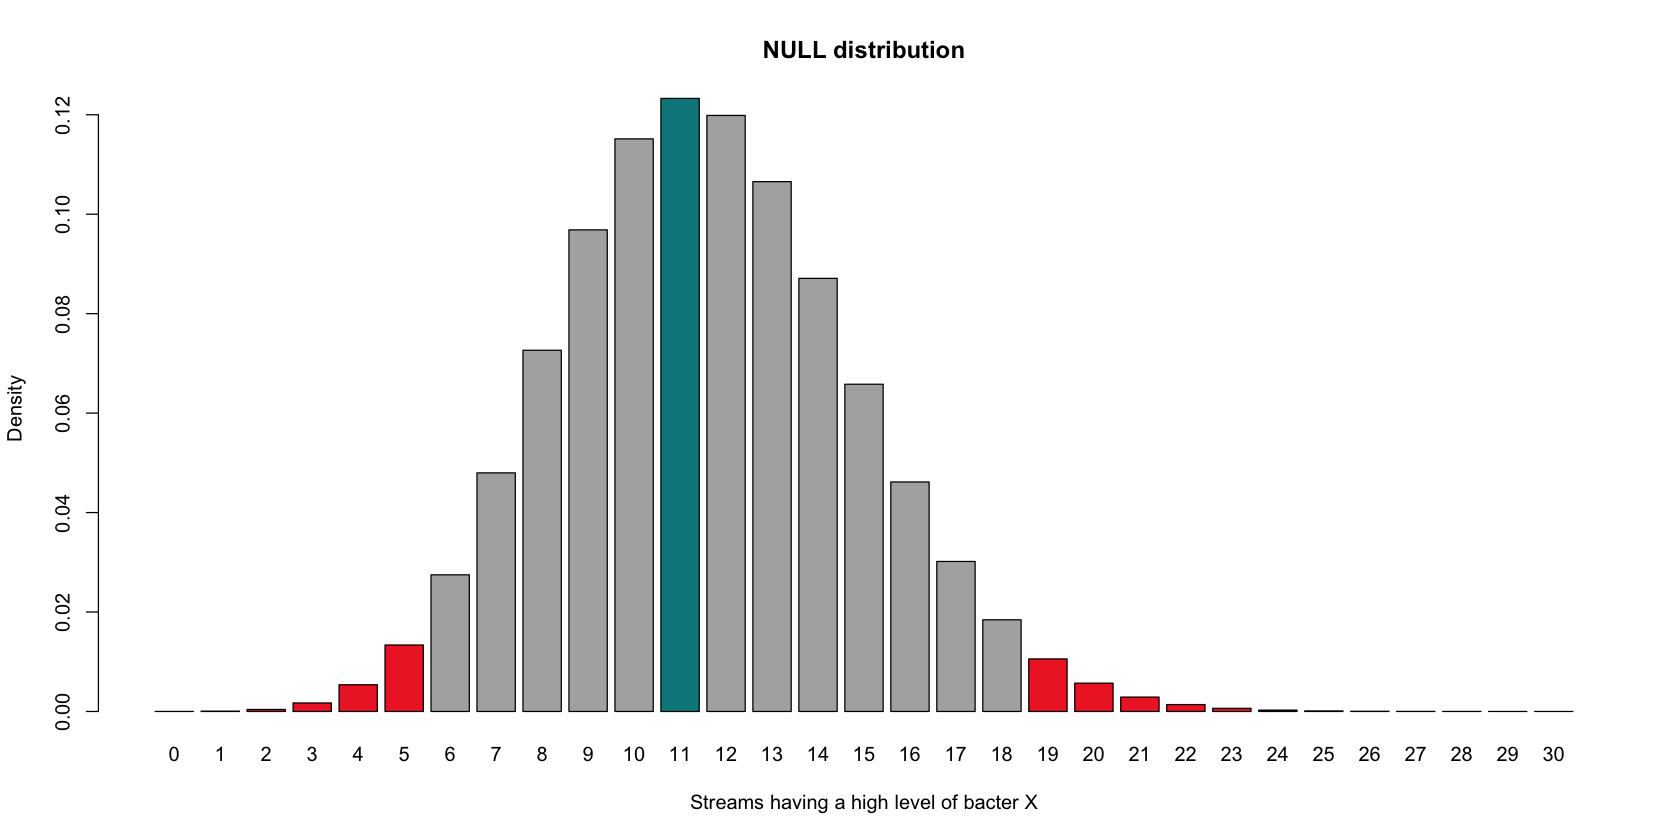

In [15]:
cols <- rep('gray69', 30)
cols <- replace(cols, c(seq(1, 6,1), seq(20, 30)), 'firebrick2')
cols <- replace(cols, 12, 'turquoise4')
options(repr.plot.width=14, repr.plot.height=7)
x <- seq(0,30)
barplot(dbinom(x, 116, 0.1), names.arg=x, col=cols, main='NULL distribution', xlab='Streams having a high level of bacter X', ylab='Density')

The measurement belongs clearly to the null hypothesis acceptance region, so I will **accept** the null hypothesis.

## A new measurement has been performed!

### E

The frequentist estimator for $p$, in the light of these data, is $$p=\frac{y}{n}=\frac{9}{165}=0.054$$

### F
The Bayesian estimator for $p$ will be the mean of the two posterior distributions found using the two different priors.


In [16]:
#data from new measurements
n.new=165
y.new=9

#posterior with the beta(1,10) as prior
alpha.p1<-1+y.new
beta.p1<-10+n.new-y.new

post.1<-function(x){
    dbeta(x,alpha.p1,beta.p1)
} 

#posterior with the beta(12,115) (old posterior) as prior
alpha.p2<-12+y.new
beta.p2<-115+n.new-y.new

post.2<-function(x){
    dbeta(x,alpha.p2,beta.p2)
} 

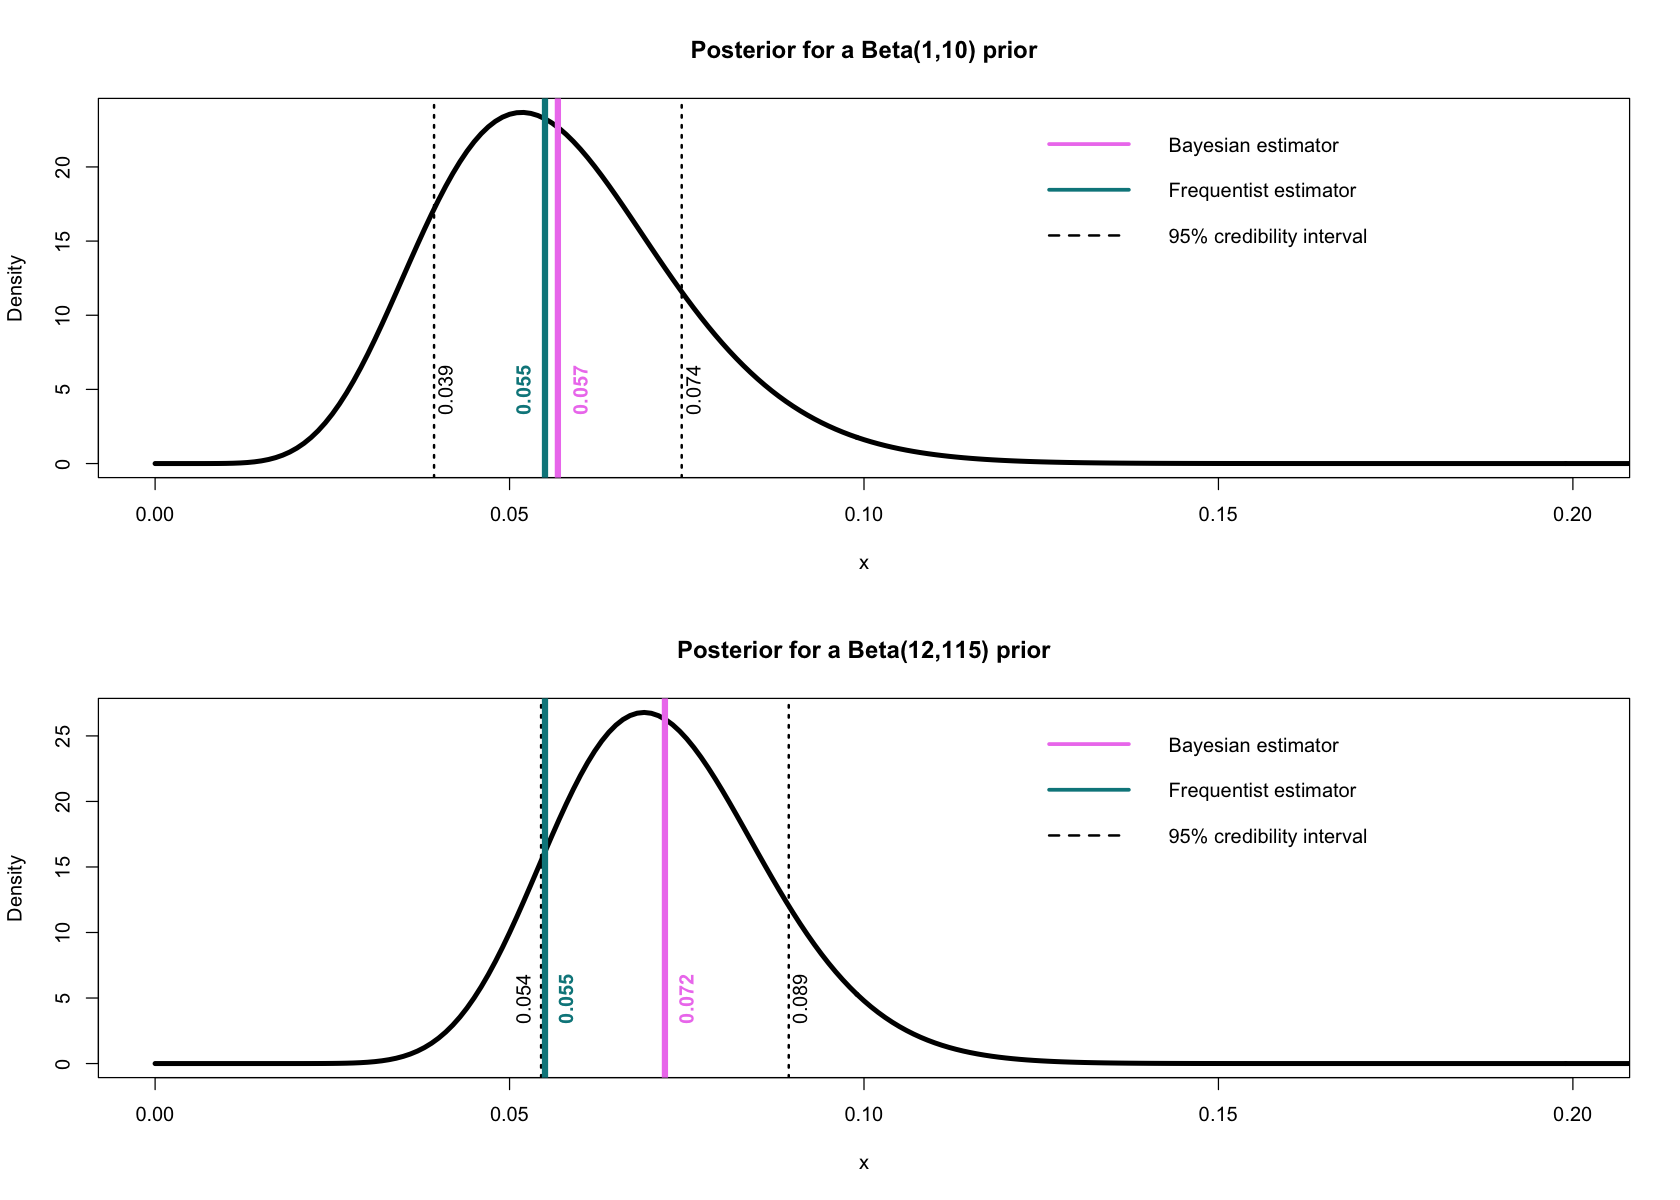

In [17]:
par(mfrow = c(2, 1))

x<-seq(0,1,by=0.001)

options(repr.plot.width=14, repr.plot.height=10)

mean1<-(alpha.p1)/(alpha.p1+beta.p1)
var1<-(1/(n.new+2))^2*n.new*(y.new/n.new)*(1-(y.new/n.new))
std1<-sqrt(var1)

plot(x,post.1(x)/integrate(post.1,0,1)$value,type='l',xlim=c(0,0.2),xlab='x',ylab='Density',main='Posterior for a Beta(1,10) prior',col='black',lwd=4)

abline(v=mean1,     lwd=5, col='violet')
abline(v=mean1-std1, lwd=2, lty='dotted')
abline(v=mean1+std1, lwd=2, lty='dotted')
abline(v=round(y.new/n.new,3),lwd=5, col='turquoise4')
legend('topright',legend=c("Bayesian estimator", "Frequentist estimator", "95% credibility interval"),col=c("violet","turquoise4","black"),lty=c(1,1,2),lwd=c(3,3,2),bty = "n",)

text(x=round(mean1-std1,3)+0.002,y=5,round(mean1-std1,3),srt=90)
text(x=round(y.new/n.new,3)-0.003,y=5,round(y.new/n.new,3),srt=90, col ='turquoise4', font=2)
text(x=round(mean1,3)+0.003,y=5,round(mean1,3),srt=90, col ='violet', font=2)
text(x=round(mean1+std1,3)+0.002,y=5,round(mean1+std1,3),srt=90)

mean2<-(alpha.p2)/(alpha.p2+beta.p2)
var2<-(1/(n.new+2))^2*n.new*(y.new/n.new)*(1-(y.new/n.new))
std2<-sqrt(var2)

plot(x,post.2(x)/integrate(post.2,0,1)$value,type='l',xlim=c(0,0.2),xlab='x',ylab='Density',main='Posterior for a Beta(12,115) prior',col='black',lwd=4)

abline(v=mean2,      lwd=5, col='violet')
abline(v=mean2-std2, lwd=2, lty='dotted')
abline(v=mean2+std2, lwd=2, lty='dotted')
abline(v=round(y.new/n.new,3),lwd=5, col='turquoise4')
legend('topright',legend=c("Bayesian estimator", "Frequentist estimator", "95% credibility interval"),col=c("violet","turquoise4","black"),lty=c(1,1,2),lwd=c(3,3,2),bty = "n",)

text(x=round(mean2-std2,3)-0.002,y=5,round(mean2-std2,3),srt=90)
text(x=round(y.new/n.new,3)+0.003,y=5,round(y.new/n.new,3),srt=90, col ='turquoise4', font=2)
text(x=round(mean2,3)+0.003,y=5,round(mean2,3),srt=90, col ='violet', font=2)
text(x=round(mean2+std2,3)+0.002,y=5,round(mean2+std2,3),srt=90)

### H - Bayesian approach

In [18]:
print("========|Beta(1,10) prior|========")
post1.values <- post.1(x)
post1.area  <- (1/length(post1.values))*cumsum(post1.values )
print(paste('The mean of the posterior (that in our convention is the Bayesian estimator for p) is:', round(mean1,3)))
print(paste('The variance is', round(var1,4)))
print(paste('The credibility interval is:',paste0('[',credibility.95(post1.area)[1],",",credibility.95(post1.area)[2],']')))
print('                                  ')
print("=======|Beta(12,115) prior|=======")
post2.values <- post.2(x)
post2.area  <- (1/length(post2.values))*cumsum(post2.values )
print(paste('The mean of the posterior (that in our convention is the Bayesian estimator for p) is:', round(mean2,3)))
print(paste('The variance is', round(var2,4)))
print(paste('The credibility interval is:',paste0('[',credibility.95(post2.area)[1],",",credibility.95(post2.area)[2],']')))

[1] "========|Beta(1,10) prior|========"
[1] "The mean of the posterior (that in our convention is the Bayesian estimator for p) is: 0.057"
[1] "The variance is 3e-04"
[1] "The credibility interval is: [0.0275,0.0955]"
[1] "                                  "
[1] "=======|Beta(12,115) prior|======="
[1] "The mean of the posterior (that in our convention is the Bayesian estimator for p) is: 0.072"
[1] "The variance is 3e-04"
[1] "The credibility interval is: [0.0445,0.1035]"


### H
#### Bayesian approach

Using the $\beta(1,10)$ as a prior, $p=0.1$ is outside the crediiblity interval of $95\%$, so we **reject** the null hypothesis.
Using the older posterior $\beta(12,115)$ as a prior, $p=0.1$ is inside the crediblity interval of $95\%$, so we **accept** the null hypothesis. Let's see what happens with a frequentist approach.

#### Frequentist approach

In defining the rejection region, I take into account that $p$ has a discrete distribution, and choose the level of significance as close to 5\% as possible.

In [19]:
r.lo <- qbinom(0.025, n.new, 0.1)
r.hi <- qbinom(0.975, n.new, 0.1)
paste('The acceptance area is:',round(sum(dbinom(r.lo:r.hi, 165,0.1)),3))
paste('alpha is:',1-round(sum(dbinom(r.lo:r.hi, 165,0.1)),3))

[1] "The acceptance area is: 0.963"

[1] "alpha is: 0.037"

The acceptance area has to be $\geq 95\%$, and in this case we are good. The acceptance area will span between bins $r.lo=9$ to $r.hi=24$, both included.

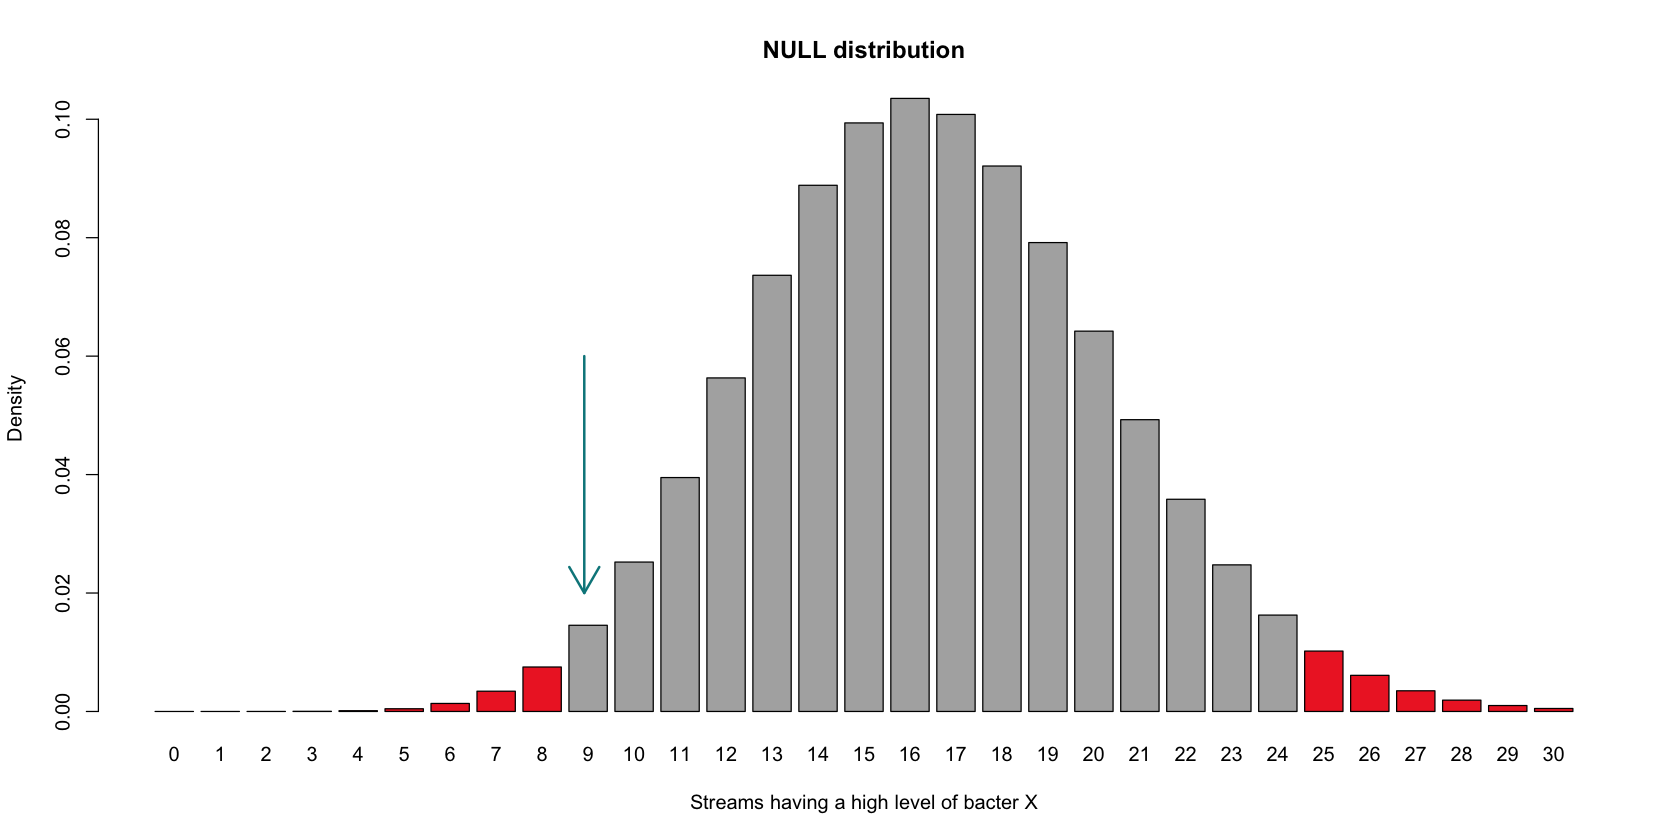

In [20]:
cols <- rep('gray69', 30)
cols <- replace(cols, c(seq(1, 9,1), seq(26, 30)), 'firebrick2')

options(repr.plot.width=14, repr.plot.height=7)
x <- seq(0,30)
barplot(dbinom(x, n.new, 0.1), names.arg=x, col=cols, main='NULL distribution', xlab='Streams having a high level of bacter X', ylab='Density')

arrows(11.4, 0.06, 11.4, 0.02, length = 0.25, code=2, lwd=2, col='turquoise4')

In [21]:
binom.test(9,165,0.1)


	Exact binomial test

data:  9 and 165
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


The $binom.test$ gives a $p-value=0.05112$, that is the exact result I obtain if I include in the area calculus also the bin corresponding to 9:

In [22]:
paste('The p-value is:',round(sum(dbinom(0:r.lo,165,0.1))+sum(dbinom(r.hi+1:100,165,0.1)),5))

[1] "The p-value is: 0.05112"

In this exercise I observe how is delicate to perform a test of hypothesis with the frequentist approach. In the Bayesian case, I only need to check wether the measurement is inside the 95\% credibility interval or not, since in this case I always end up with a continuous distribution.